In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_excel("basket.xlsx")

In [3]:
data.head()

,contact_id,email_1,order_number,category,sku,name,quantity,price,tax,discount
0,6630,falconeantony@libero.it,7590,"I PIU' VENDUTI DEL MESE, Pulizia Vetri Auto",H0539,Glass Cleaner sgrassatore vetri auto,1,4.5,0.81,0.9
1,516,michele.cavallaro@alice.it,11711,"I PIU' VENDUTI DEL MESE, Pulizia Vetri Auto",H0539,Glass Cleaner sgrassatore vetri auto,2,4.5,0.81,0.9
2,550268,feoliciro@gmail.com,18002,"I PIU' VENDUTI DEL MESE, Pulizia Vetri Auto",H0539,Glass Cleaner sgrassatore vetri auto,1,4.5,0.81,0.0
3,117820,pietro.allevi@gmail.com,8473,"I PIU' VENDUTI DEL MESE, Pulizia Vetri Auto",H0539,Glass Cleaner sgrassatore vetri auto,1,4.5,0.81,0.0
4,273653,notdtzone@libero.it,14451,"I PIU' VENDUTI DEL MESE, Pulizia Vetri Auto",H0539,Glass Cleaner sgrassatore vetri auto,1,4.5,0.81,0.0


In [4]:
# Clean up spaces in description and remove any rows that don't have a valid invoice
data['name'] = data['name'].str.strip()
data.dropna(axis=0, subset=['contact_id'], inplace=True)
data['contact_id'] = data['contact_id'].astype('str')
data = data[~data['contact_id'].str.contains('na')]

In [5]:
data["name"]

0        Glass Cleaner sgrassatore vetri auto
1        Glass Cleaner sgrassatore vetri auto
2        Glass Cleaner sgrassatore vetri auto
3        Glass Cleaner sgrassatore vetri auto
4        Glass Cleaner sgrassatore vetri auto
                         ...                 
65530           CarWash Shampoo & Cera 1000ml
65531           CarWash Shampoo & Cera 1000ml
65532           CarWash Shampoo & Cera 1000ml
65533           CarWash Shampoo & Cera 1000ml
65534           CarWash Shampoo & Cera 1000ml
Name: name, Length: 65535, dtype: object

In [6]:
data["category"]

0        I PIU' VENDUTI DEL MESE, Pulizia Vetri Auto
1        I PIU' VENDUTI DEL MESE, Pulizia Vetri Auto
2        I PIU' VENDUTI DEL MESE, Pulizia Vetri Auto
3        I PIU' VENDUTI DEL MESE, Pulizia Vetri Auto
4        I PIU' VENDUTI DEL MESE, Pulizia Vetri Auto
                            ...                     
65530         I PIU' VENDUTI DEL MESE, Lavaggio Auto
65531         I PIU' VENDUTI DEL MESE, Lavaggio Auto
65532         I PIU' VENDUTI DEL MESE, Lavaggio Auto
65533         I PIU' VENDUTI DEL MESE, Lavaggio Auto
65534         I PIU' VENDUTI DEL MESE, Lavaggio Auto
Name: category, Length: 65535, dtype: object

In [7]:
list(data["name"].unique())

['Glass Cleaner sgrassatore vetri auto',
 'Last Touch Express cera liquida',
 'Diamant Plast 4 - 250ml',
 'Grill Brill',
 'Sgrasso High Tech',
 'Bacteryd Fast',
 'Bathy Plus',
 'Pulitore Vetri',
 'Lavapavimenti Antiodori Oxygen',
 'Pulitore Divani e Tappeti',
 'Pulitore Lettiere',
 'Shampoo Secco per Cani',
 'Shampoo Cani Pelo Bianco',
 'Shampoo Cani Pelo Corto',
 'Shampoo Cani Pelo Lungo',
 'Rimuovi Odori 125ml',
 'Shampoo Secco Gatti e Furetti',
 'POLO TECHNO NEW',
 'Kit Regénera Fari',
 'White Pad 2.0',
 'Orange Pad 2.0',
 'Yellow Pad 2.0',
 'Black Pad L 2.0 5p',
 'Kit Tamponi - Polish auto',
 'Step 1 Corrector 250ml',
 'Step 2 Versatile 250ml',
 'Step 3 Sincero 250ml',
 'Step 4 Illumina 250ml',
 'Step 3 Splendida 250ml',
 'KIT PULIZIA CAPOTE',
 'Resin Off',
 'Polish Clever',
 'Tergy Summer 250ml',
 'Spazzola Elimina Peli',
 'Wendy',
 'Sviting Rapid Spray 200ml',
 'M7 Plus 500ml',
 'Oil Silic 200ml',
 'Metal Car',
 'Metal Crem-Cera lucida',
 'Faspoiler',
 'Charme Detergent',
 'Charm

<function matplotlib.pyplot.legend(*args, **kwargs)>

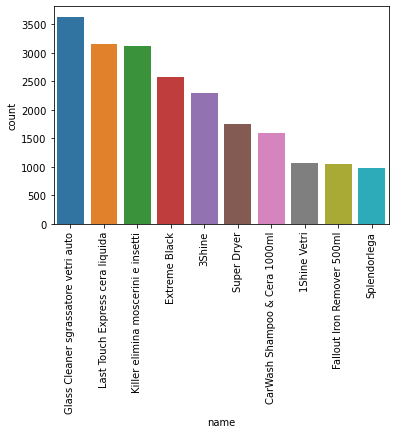

<Figure size 1440x720 with 0 Axes>

In [8]:
sns.countplot(x = 'name', data = data, order = data['name'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.figure(figsize=(20,10))
plt.legend

In [9]:
basket = (data
          .groupby(['contact_id', 'name'])['quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('contact_id'))

In [10]:
basket.head()

name,1Shine Esterno,1Shine Interno,1Shine Vetri,20 Cut Disc grana 1000,20 Cut Disc grana 2000,20 Cut Disc grana 320,20 Cut Disc grana 4000,20 Cut Disc grana 600,3 x Polishing Cloth,3Shine,...,V.O.B.O. EOLO,Velcrem,Virbuster Dry Fog 1L,WC Chimik,Washer Plus,Waterline Clean,Wendy,White Pad 2.0,Woody,Yellow Pad 2.0
contact_id,,,,,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1001127,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1001169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# Convert the units to 1 hot encoded values
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)


In [12]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [13]:
# Build up the frequent items
frequent_itemsets = apriori(basket_sets, min_support=0.03, use_colnames=True)

In [14]:
# Create the rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(1Shine Vetri),(Glass Cleaner sgrassatore vetri auto),0.059992,0.186558,0.031411,0.523580,2.806527,0.020219,1.707406
1,(Glass Cleaner sgrassatore vetri auto),(1Shine Vetri),0.186558,0.059992,0.031411,0.168369,2.806527,0.020219,1.130319
2,(3Shine),(Glass Cleaner sgrassatore vetri auto),0.127201,0.186558,0.053756,0.422606,2.265276,0.030026,1.408815
3,(Glass Cleaner sgrassatore vetri auto),(3Shine),0.186558,0.127201,0.053756,0.288146,2.265276,0.030026,1.226092
4,(3Shine),(Killer elimina moscerini e insetti),0.127201,0.151279,0.033547,0.263731,1.743344,0.014304,1.152733


In [15]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(1Shine Vetri),(Glass Cleaner sgrassatore vetri auto),0.059992,0.186558,0.031411,0.523580,2.806527,0.020219,1.707406
1,(Glass Cleaner sgrassatore vetri auto),(1Shine Vetri),0.186558,0.059992,0.031411,0.168369,2.806527,0.020219,1.130319
2,(3Shine),(Glass Cleaner sgrassatore vetri auto),0.127201,0.186558,0.053756,0.422606,2.265276,0.030026,1.408815
3,(Glass Cleaner sgrassatore vetri auto),(3Shine),0.186558,0.127201,0.053756,0.288146,2.265276,0.030026,1.226092
4,(3Shine),(Killer elimina moscerini e insetti),0.127201,0.151279,0.033547,0.263731,1.743344,0.014304,1.152733
5,(Killer elimina moscerini e insetti),(3Shine),0.151279,0.127201,0.033547,0.221756,1.743344,0.014304,1.121497
6,(3Shine),(Last Touch Express cera liquida),0.127201,0.166465,0.040591,0.319110,1.916986,0.019417,1.224186
7,(Last Touch Express cera liquida),(3Shine),0.166465,0.127201,0.040591,0.243843,1.916986,0.019417,1.154256
8,(Glass Cleaner sgrassatore vetri auto),(Extreme Black),0.186558,0.114325,0.034586,0.185392,1.621614,0.013258,1.087240
9,(Extreme Black),(Glass Cleaner sgrassatore vetri auto),0.114325,0.186558,0.034586,0.302525,1.621614,0.013258,1.166267


In [16]:
# Replace frozen sets with strings
rules['antecedents_'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents_'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

In [17]:
# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules.pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')

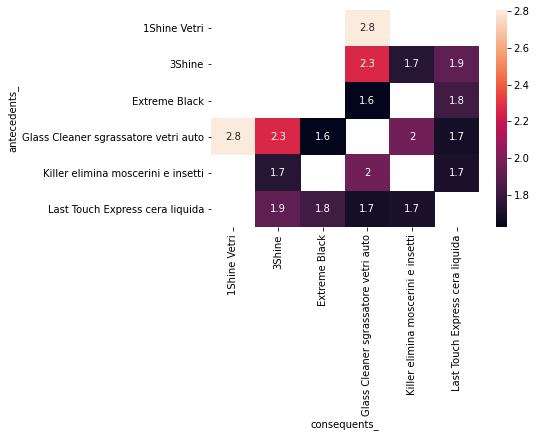

<Figure size 2160x1080 with 0 Axes>

In [18]:
sns.heatmap(pivot, annot = True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.figure(figsize=(30,15))
plt.show()

In [19]:
basket_2 = (data
          .groupby(['order_number', 'name'])['quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('order_number'))

In [20]:
basket_2.head()

name,1Shine Esterno,1Shine Interno,1Shine Vetri,20 Cut Disc grana 1000,20 Cut Disc grana 2000,20 Cut Disc grana 320,20 Cut Disc grana 4000,20 Cut Disc grana 600,3 x Polishing Cloth,3Shine,...,V.O.B.O. EOLO,Velcrem,Virbuster Dry Fog 1L,WC Chimik,Washer Plus,Waterline Clean,Wendy,White Pad 2.0,Woody,Yellow Pad 2.0
order_number,,,,,,,,,,,,,,,,,,,,,
23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:

basket_sets_2 = basket.applymap(encode_units)


In [22]:
frequent_itemsets_2 = apriori(basket_sets_2, min_support=0.03, use_colnames=True)

In [23]:
rules_2 = association_rules(frequent_itemsets_2, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_,consequents_
0,(1Shine Vetri),(Glass Cleaner sgrassatore vetri auto),0.059992,0.186558,0.031411,0.523580,2.806527,0.020219,1.707406,1Shine Vetri,Glass Cleaner sgrassatore vetri auto
1,(Glass Cleaner sgrassatore vetri auto),(1Shine Vetri),0.186558,0.059992,0.031411,0.168369,2.806527,0.020219,1.130319,Glass Cleaner sgrassatore vetri auto,1Shine Vetri
2,(3Shine),(Glass Cleaner sgrassatore vetri auto),0.127201,0.186558,0.053756,0.422606,2.265276,0.030026,1.408815,3Shine,Glass Cleaner sgrassatore vetri auto
3,(Glass Cleaner sgrassatore vetri auto),(3Shine),0.186558,0.127201,0.053756,0.288146,2.265276,0.030026,1.226092,Glass Cleaner sgrassatore vetri auto,3Shine
4,(3Shine),(Killer elimina moscerini e insetti),0.127201,0.151279,0.033547,0.263731,1.743344,0.014304,1.152733,3Shine,Killer elimina moscerini e insetti


In [24]:
rules_2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(1Shine Vetri),(Glass Cleaner sgrassatore vetri auto),0.059992,0.186558,0.031411,0.523580,2.806527,0.020219,1.707406
1,(Glass Cleaner sgrassatore vetri auto),(1Shine Vetri),0.186558,0.059992,0.031411,0.168369,2.806527,0.020219,1.130319
2,(3Shine),(Glass Cleaner sgrassatore vetri auto),0.127201,0.186558,0.053756,0.422606,2.265276,0.030026,1.408815
3,(Glass Cleaner sgrassatore vetri auto),(3Shine),0.186558,0.127201,0.053756,0.288146,2.265276,0.030026,1.226092
4,(3Shine),(Killer elimina moscerini e insetti),0.127201,0.151279,0.033547,0.263731,1.743344,0.014304,1.152733
5,(Killer elimina moscerini e insetti),(3Shine),0.151279,0.127201,0.033547,0.221756,1.743344,0.014304,1.121497
6,(3Shine),(Last Touch Express cera liquida),0.127201,0.166465,0.040591,0.319110,1.916986,0.019417,1.224186
7,(Last Touch Express cera liquida),(3Shine),0.166465,0.127201,0.040591,0.243843,1.916986,0.019417,1.154256
8,(Glass Cleaner sgrassatore vetri auto),(Extreme Black),0.186558,0.114325,0.034586,0.185392,1.621614,0.013258,1.087240
9,(Extreme Black),(Glass Cleaner sgrassatore vetri auto),0.114325,0.186558,0.034586,0.302525,1.621614,0.013258,1.166267


In [25]:
# Replace frozen sets with strings
rules_2['antecedents_'] = rules_2['antecedents'].apply(lambda a: ','.join(list(a)))
rules_2['consequents_'] = rules_2['consequents'].apply(lambda a: ','.join(list(a)))

In [26]:
# Transform the DataFrame of rules into a matrix using the lift metric
pivot_2 = rules_2.pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')

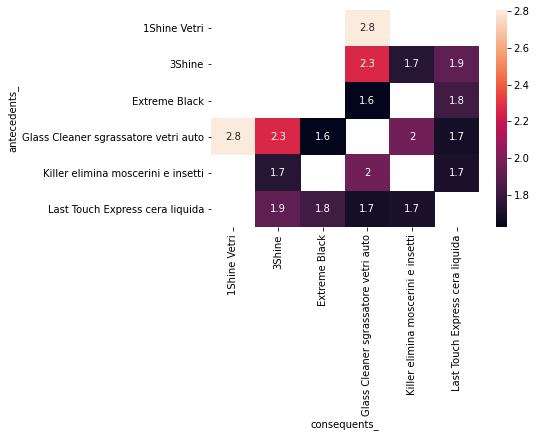

<Figure size 2160x1080 with 0 Axes>

In [27]:
sns.heatmap(pivot_2, annot = True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.figure(figsize=(30,15))
plt.show()